In [2]:
!pip install sympy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 32.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import torch
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
mnist_full = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

'''# Mask to select only digits 1 and 7
train_mask = (mnist_full.targets == 1) | (mnist_full.targets == 7)
test_mask = (mnist_test.targets == 1) | (mnist_test.targets == 7)

# Apply the mask to filter out the data
mnist_full.data = mnist_full.data[train_mask]
mnist_full.targets = mnist_full.targets[train_mask]
mnist_test.data = mnist_test.data[test_mask]
mnist_test.targets = mnist_test.targets[test_mask]

# Map targets to 0 (for 1) and 1 (for 7)
mnist_full.targets = (mnist_full.targets == 7).float()
mnist_test.targets = (mnist_test.targets == 7).float()

# Split the training dataset into training and validation sets (80% train, 20% val)
train_size = int(0.8 * len(mnist_full))
val_size = len(mnist_full) - train_size
train_dataset, val_dataset = random_split(mnist_full, [train_size, val_size])

# Define the batch size
batch_size = 64

# Create DataLoader for train, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Verify Dataset Sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(mnist_test)}\n\n")'''


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 141MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 53.3MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 63.6MB/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.16MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



'# Mask to select only digits 1 and 7\ntrain_mask = (mnist_full.targets == 1) | (mnist_full.targets == 7)\ntest_mask = (mnist_test.targets == 1) | (mnist_test.targets == 7)\n\n# Apply the mask to filter out the data\nmnist_full.data = mnist_full.data[train_mask]\nmnist_full.targets = mnist_full.targets[train_mask]\nmnist_test.data = mnist_test.data[test_mask]\nmnist_test.targets = mnist_test.targets[test_mask]\n\n# Map targets to 0 (for 1) and 1 (for 7)\nmnist_full.targets = (mnist_full.targets == 7).float()\nmnist_test.targets = (mnist_test.targets == 7).float()\n\n# Split the training dataset into training and validation sets (80% train, 20% val)\ntrain_size = int(0.8 * len(mnist_full))\nval_size = len(mnist_full) - train_size\ntrain_dataset, val_dataset = random_split(mnist_full, [train_size, val_size])\n\n# Define the batch size\nbatch_size = 64\n\n# Create DataLoader for train, validation, and test sets\ntrain_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [5]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

mnist_full = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_mask = (mnist_full.targets == 1) | (mnist_full.targets == 7)
test_mask = (mnist_test.targets == 1) | (mnist_test.targets == 7)

mnist_full.data = mnist_full.data[train_mask]
mnist_full.targets = mnist_full.targets[train_mask]
mnist_test.data = mnist_test.data[test_mask]
mnist_test.targets = mnist_test.targets[test_mask]

mnist_full.targets = (mnist_full.targets == 7).float() #mapping to 0(6) and 1(9)
mnist_test.targets = (mnist_test.targets == 7).float()

train_size = int(0.8 * len(mnist_full)) #splitting 80% train, 20% val
val_size = len(mnist_full) - train_size
train_dataset, val_dataset = random_split(mnist_full, [train_size, val_size])

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Print the sizes of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(mnist_test)}")


Training dataset size: 10405
Validation dataset size: 2602
Test dataset size: 2163


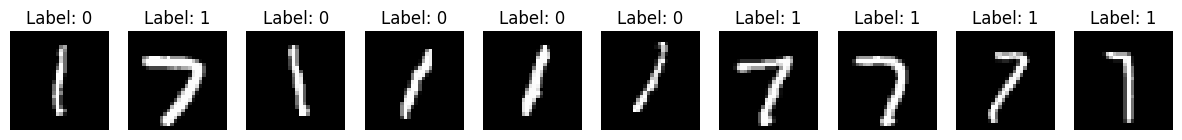

In [6]:

def show_images(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)

    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axes[i].imshow(images[i].squeeze(), cmap="gray")
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis("off")
    plt.show()

show_images(train_loader)

In [7]:

import numpy as np

X_train = []
y_train = []
for images, labels in train_loader:
    X_train.append(images.view(images.shape[0], -1).numpy())
    y_train.append(labels.numpy())
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)


X_test = []
y_test = []
for images, labels in test_loader:
    X_test.append(images.view(images.shape[0], -1).numpy())
    y_test.append(labels.numpy())
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1132    3]
 [  13 1015]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1135
           1       1.00      0.99      0.99      1028

    accuracy                           0.99      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.99      0.99      0.99      2163



HYPERPARAMETER TUNING

In [8]:

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


X_train = []
y_train = []
for images, labels in train_loader:
    X_train.extend(images.view(images.shape[0], -1).numpy())
    y_train.extend(labels.numpy())
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
for images, labels in test_loader:
    X_test.extend(images.view(images.shape[0], -1).numpy())
    y_test.extend(labels.numpy())
X_test = np.array(X_test)
y_test = np.array(y_test)


# Defining the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Create the SVM model
svm = SVC()


grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


print(f"Best hyperparameters: {grid.best_params_}")


grid_predictions = grid.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time= 1.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time= 1.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time= 1.1min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.513 total time= 1.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.706 total time=  53.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=  55.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=  53.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.729 total time=  53.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=  52.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.992 total time=   5.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

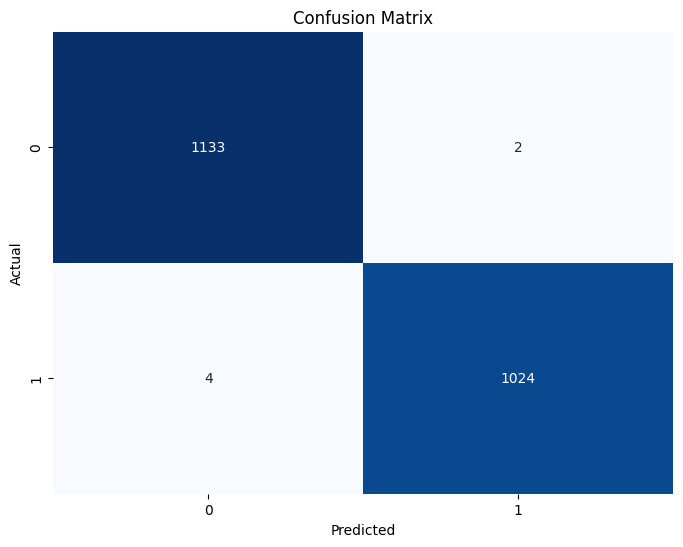

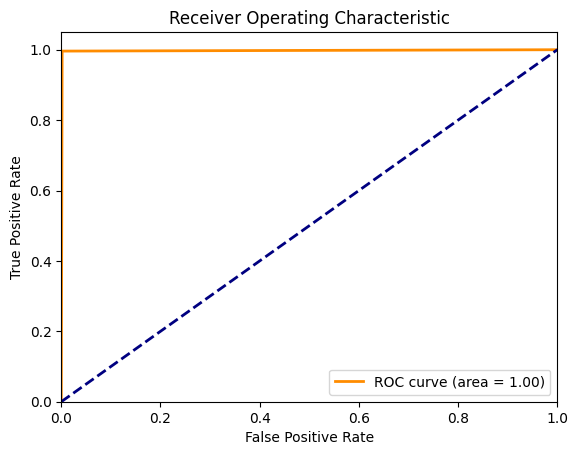

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


# Confusion Matrix
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, grid_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[1133    2]
 [   4 1024]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1135
           1       1.00      1.00      1.00      1028

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



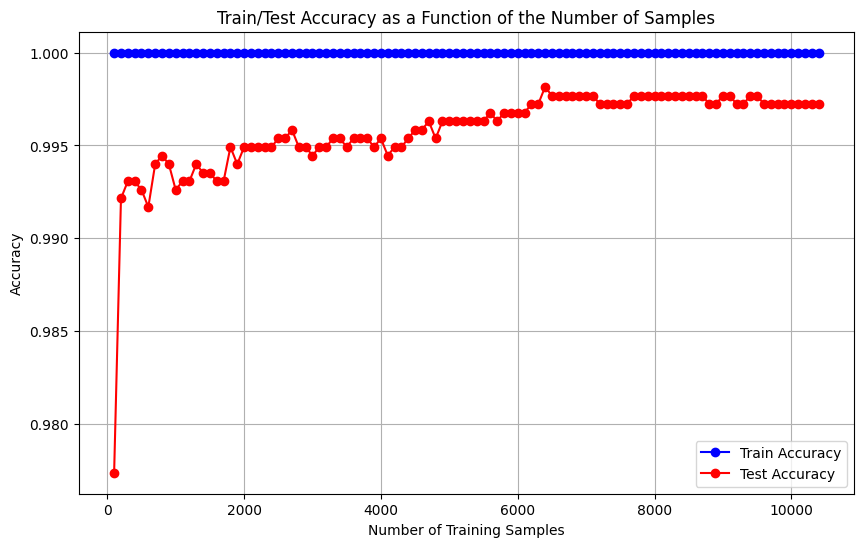

In [10]:
svm = SVC(C=10, gamma=0.01, kernel='rbf')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

train_accuracies = []
test_accuracies = []
sample_sizes = range(100, len(X_train), 100)

for size in sample_sizes:
    svm.fit(X_train[:size], y_train[:size])

    # Train accuracy
    train_acc = svm.score(X_train[:size], y_train[:size])
    train_accuracies.append(train_acc)

    # Test accuracy
    test_acc = svm.score(X_test, y_test)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracies, label="Train Accuracy", color="blue", marker="o")
plt.plot(sample_sizes, test_accuracies, label="Test Accuracy", color="red", marker="o")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy as a Function of the Number of Samples")
plt.legend()
plt.grid(True)
plt.show()


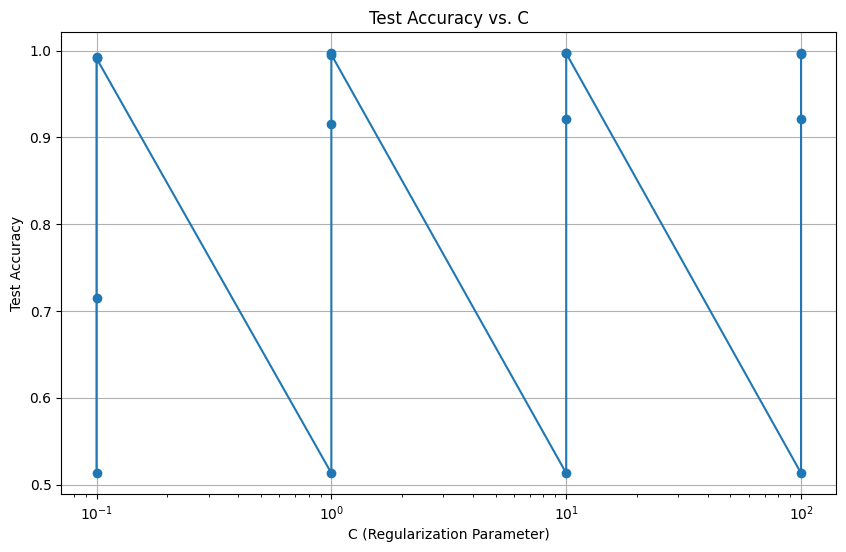

In [11]:
C_values = [item['C'] for item in grid.cv_results_['params']]
test_scores = grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(C_values, test_scores, marker='o')
plt.xscale('log')
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. C")
plt.grid(True)
plt.show()

Confusion Matrix:
[[1133    2]
 [   4 1024]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1135
           1       1.00      1.00      1.00      1028

    accuracy                           1.00      2163
   macro avg       1.00      1.00      1.00      2163
weighted avg       1.00      1.00      1.00      2163



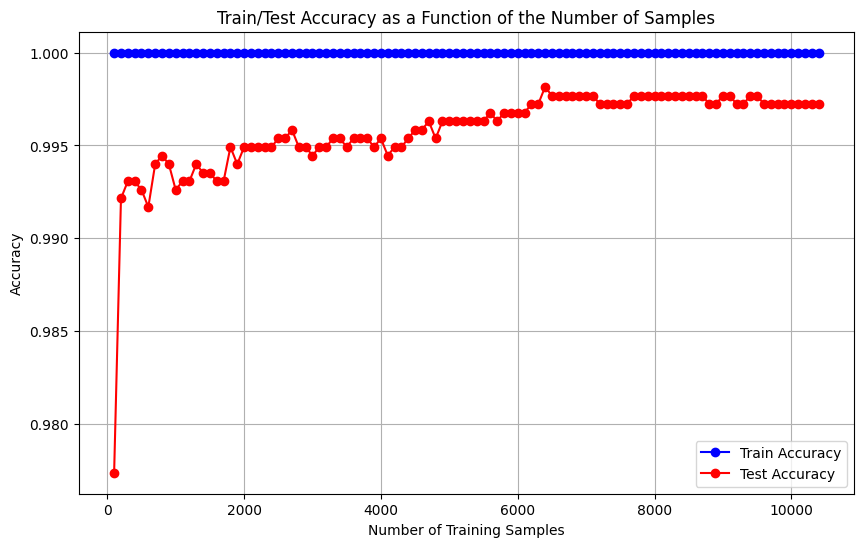

In [17]:
svm = SVC(C=10, gamma=0.01, kernel='rbf')

# Train the model on the entire training set
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Lists to store train and test accuracies
train_accuracies = []
test_accuracies = []
sample_sizes = range(100, len(X_train), 100)  # Sample sizes from 100 to total training size

# Iterate over different sample sizes
for size in sample_sizes:
    # Fit the model on a subset of the training data
    svm.fit(X_train[:size], y_train[:size])

    # Train accuracy
    train_acc = svm.score(X_train[:size], y_train[:size])
    train_accuracies.append(train_acc)

    # Test accuracy
    test_acc = svm.score(X_test, y_test)
    test_accuracies.append(test_acc)

# Plotting the accuracies vs. sample sizes
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_accuracies, label="Train Accuracy", color="blue", marker="o")
plt.plot(sample_sizes, test_accuracies, label="Test Accuracy", color="red", marker="o")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Train/Test Accuracy as a Function of the Number of Samples")
plt.legend()
plt.grid(True)
plt.show()